In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import OrderedDict 
import json
%matplotlib inline


#step 1 - read saved data, variables DONE
#step 1.5 - ignore comments
#step 2 - read from VD file - net-generation, net-generation by each tech, system cost, net co2 emissions
#step 3 - store each of the above in an array
#step 4 - generate plots
nsamples=30
nvar=10
ipdat=OrderedDict()
with open('random_samples.json') as fjson:
    ipdat = json.load(fjson)

ipdat['pwseff'][:] = [x*0.4 for x in ipdat['pwseff'][:]]
colname=[]
netgen=[]
for i in range(1,10):
    colname.append("col"+str(i))    
co2emi=[]
syscost=[]
techlist=['pws','soec','pemec','sofc','pemfc','ccsg','ccsc']
share={}
op={}
dbkey={}
for key in techlist:
    share[key]=[]
    op[key]=np.zeros((1,nsamples))
dbkey['pws']=['PWS50','H2']
dbkey['soec']=['ECSOEC50','ESOECH2']
dbkey['pemec']=['ECPEM22','EPEMH2']
dbkey['sofc']=['SOFC30','ELC']
dbkey['pemfc']=['PEMFC22','ELC']
dbkey['ccsg']=['LNGCCS22','IMECCSG']
dbkey['ccsc']=['USCCCS23','IMECCSC']

[0.20051637461561664, 0.20975019285248556, 0.21362542494182227, 0.20539623177934443, 0.20174160339283473, 0.21471151782220163, 0.22361714709956002, 0.22281763948991853, 0.22265323016365654, 0.2084418150964837, 0.2050993925617616, 0.21384834737372974, 0.2064135123805082, 0.2035258134772461, 0.2077934327674138, 0.21582937892429746, 0.22473671548572877, 0.2018562749515334, 0.20564919890778982, 0.20799820836288654, 0.2055648906524465, 0.2113858578518491, 0.20171539564904717, 0.20808386910548338, 0.2119058091332179, 0.2244770507003857, 0.2010584726158825, 0.22165291810082569, 0.2167789828370339, 0.21698911951663902]


In [2]:
#read data from raw TIMES files
for j in range(1,nsamples+1):
    dbname='sa'+str(j)+'.VD'
    rawdf = pd.read_csv(dbname,comment='*')#, delimiter=',')#, usecols = colfilter)
    rawdf.columns=colname
    cost=rawdf.loc[rawdf.col1=='ObjZ']['col9'].to_numpy()
    emi=rawdf.loc[(rawdf['col1']=='VAR_FOut') & (rawdf['col2']=='ELCCO2')]['col9'].to_numpy()
    emi=float(np.sum(emi))
    netelc=rawdf.loc[(rawdf['col1']=='VAR_FOut') & (rawdf['col2']=='ELC')]['col9'].to_numpy()
    netelc=float(np.sum(netelc))
    syscost.append(float(cost[0]))
    co2emi.append(emi)
    netgen.append(netelc)
    for key in dbkey:
        com=dbkey[key][1]
        proc=dbkey[key][0]
        op[key]=rawdf.loc[(rawdf['col1']=='VAR_FOut') & (rawdf['col2']==com) & (rawdf['col3']==proc)]['col9'].to_numpy()
        share[key].append(float(np.sum(op[key]))/netelc)



D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


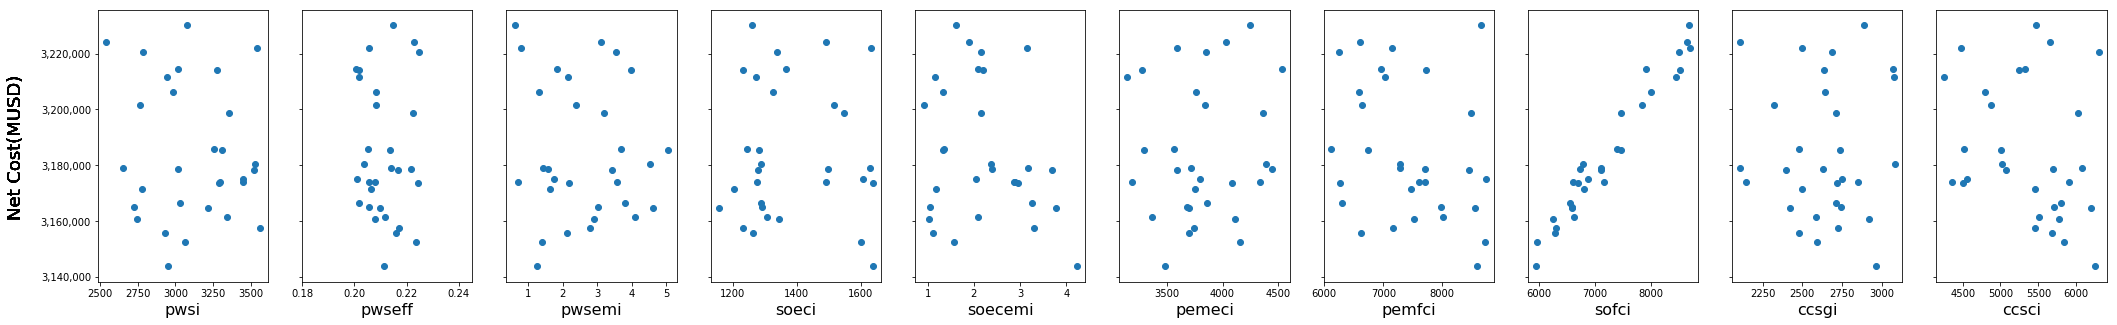

In [5]:
fig,ax=plt.subplots(1,nvar,sharey=True,figsize=(nvar*3.2,5))

for idx, key in enumerate(ipdat):
    xvals=ipdat[key][0:nsamples]
    ax[idx].scatter(xvals,syscost)
    ax[idx].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax[idx].set_xlabel(key,fontsize='16')

fig.text(0.09,0.5,"Net Cost(MUSD)",rotation='vertical',va='center',fontsize='18')
fig.savefig('syscost.png',bbox_inches='tight', dpi=300)

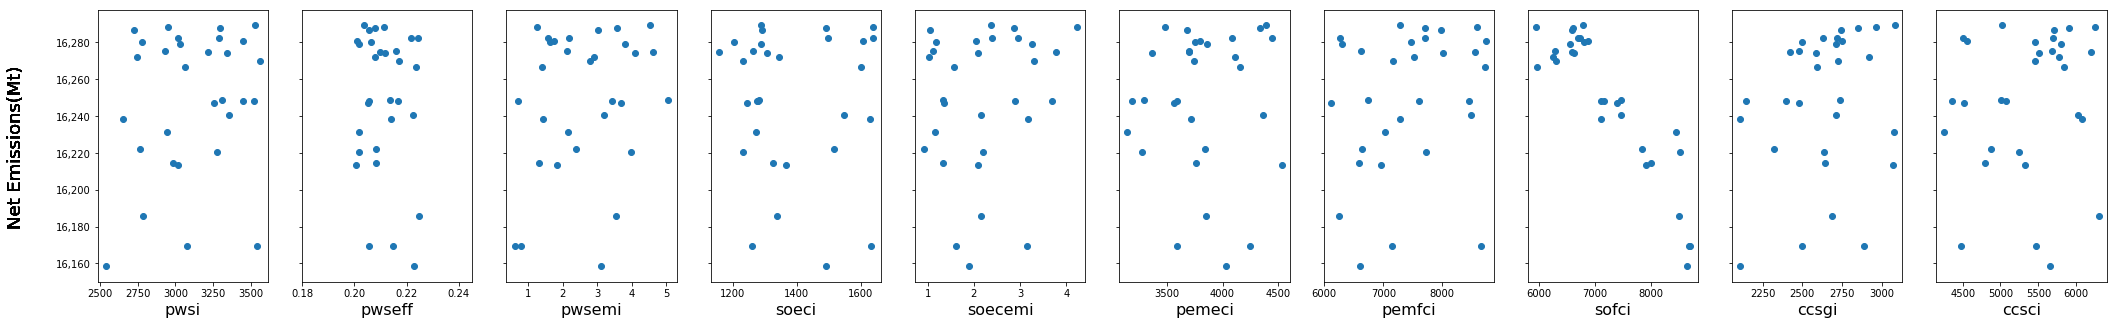

In [6]:
fig2,ax2=plt.subplots(1,nvar,sharey=True,figsize=(nvar*3.2,5))

for idx, key in enumerate(ipdat):
    xvals=ipdat[key][0:nsamples]
    ax2[idx].scatter(xvals,co2emi)
    ax2[idx].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax2[idx].set_xlabel(key,fontsize='16')

fig2.text(0.09,0.5,"Net Emissions(Mt)",rotation='vertical',va='center',fontsize='18')
fig2.savefig('co2emi.png',bbox_inches='tight', dpi=300)

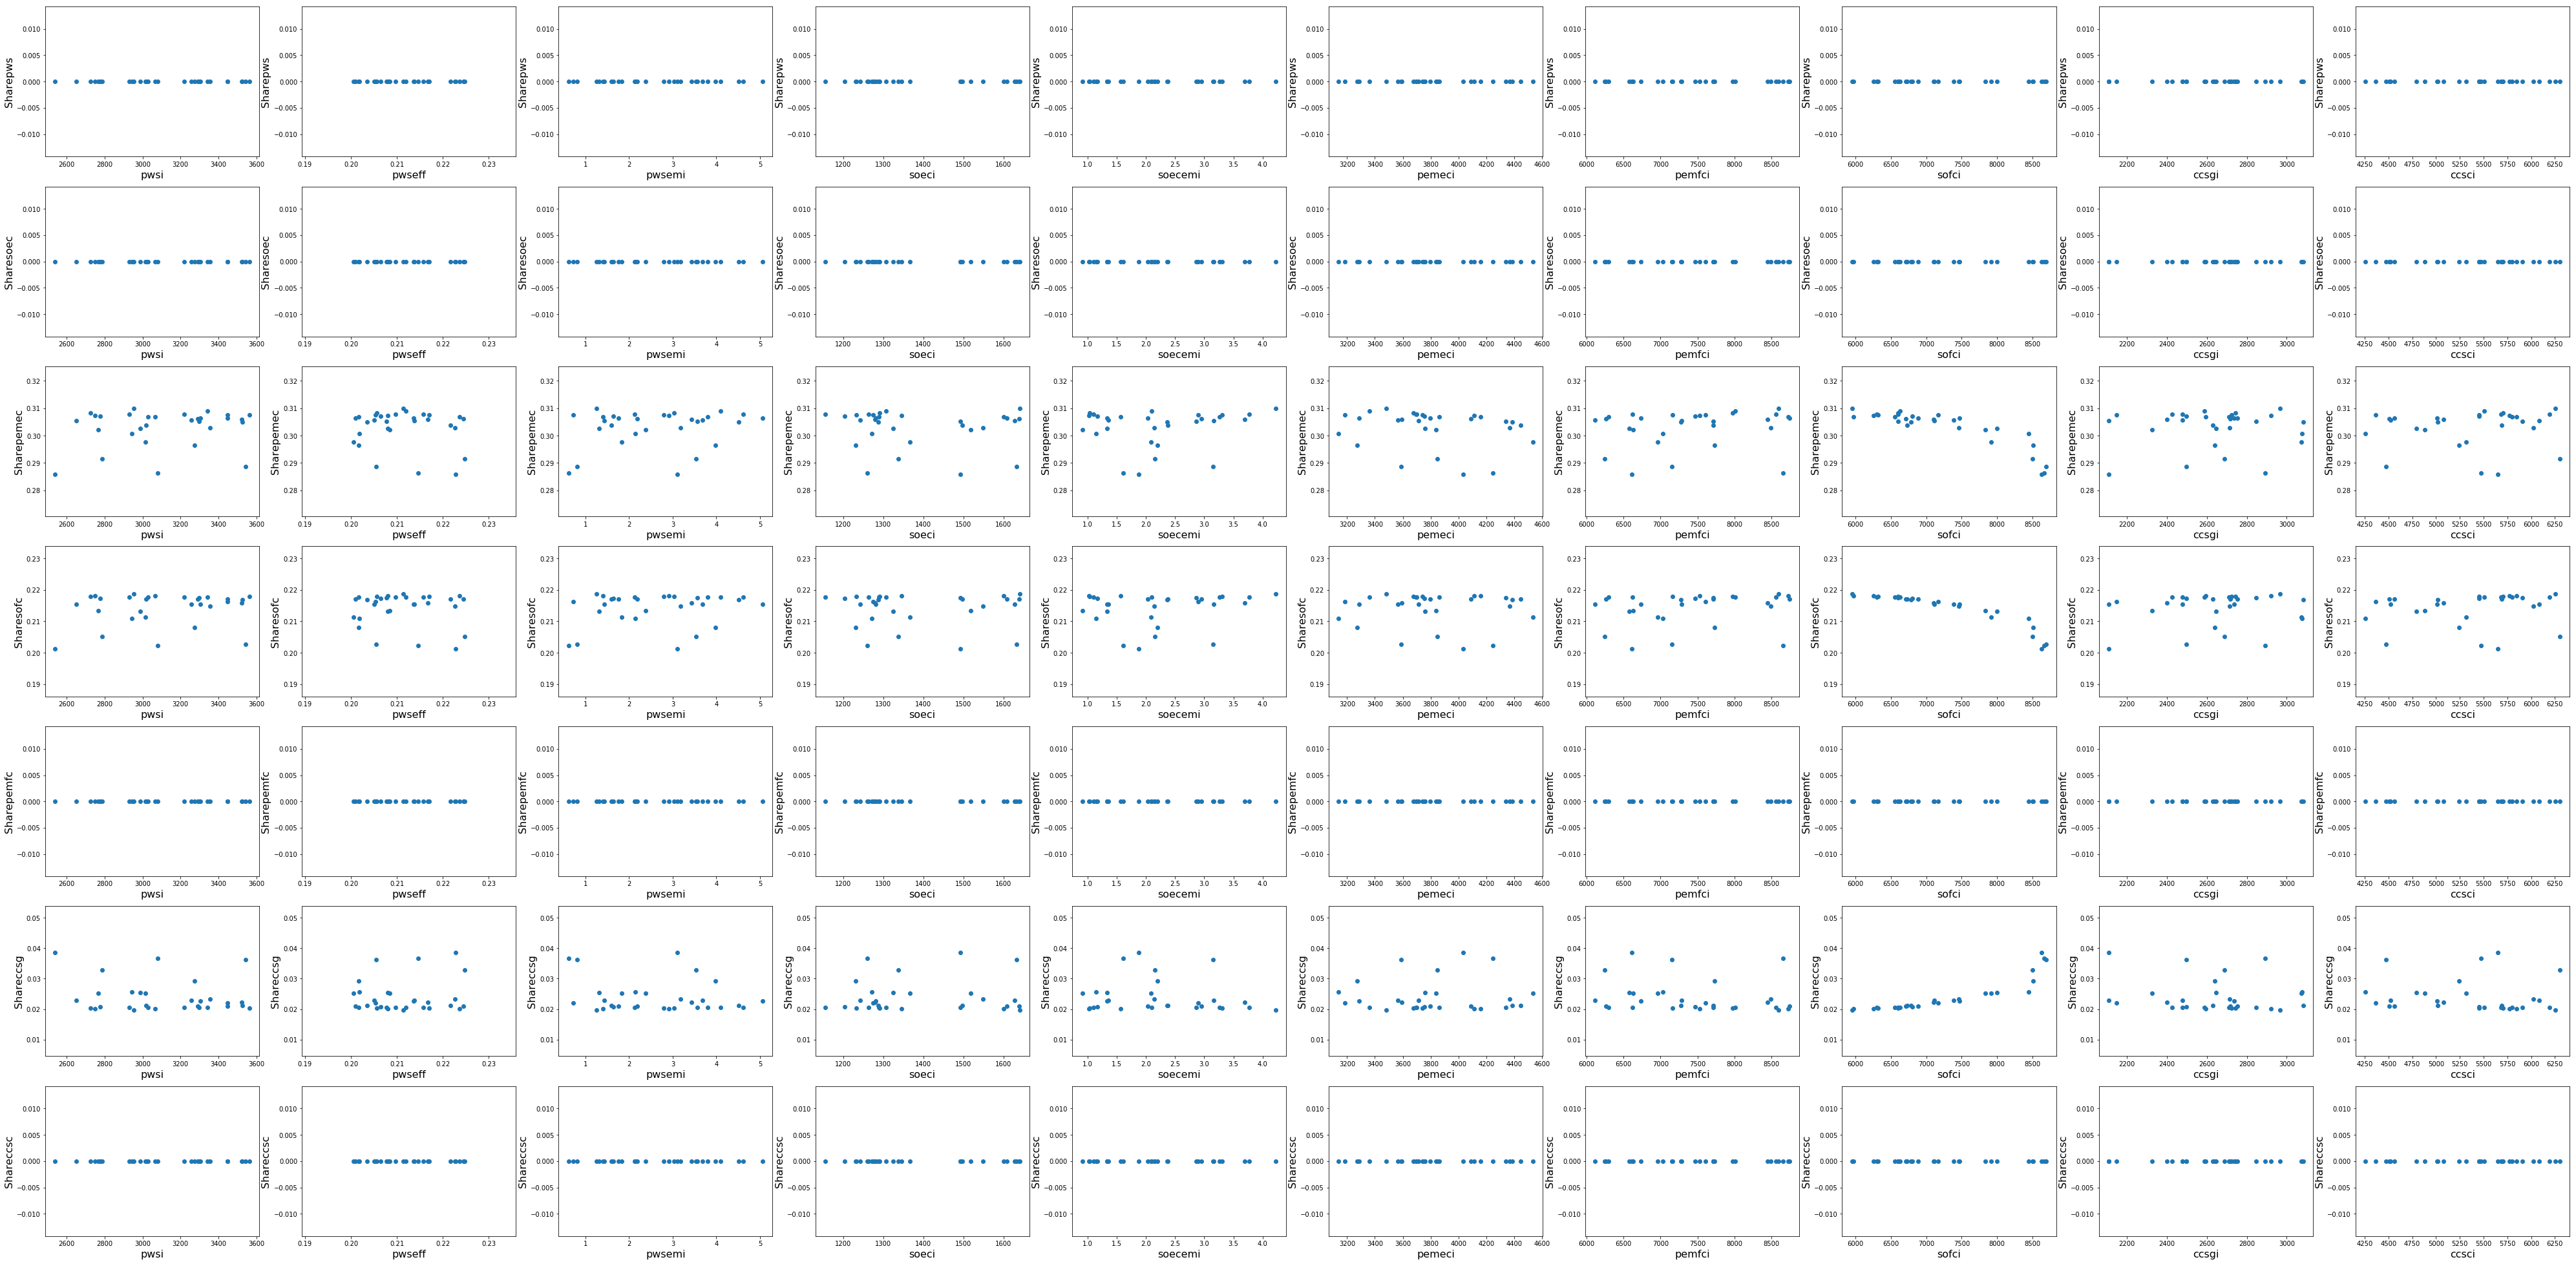

In [17]:
#pws plot
ntech=len(techlist)
fig3,ax3=plt.subplots(ntech,nvar,figsize=(nvar*7.5,35))

for idx,key in enumerate(share):
    cctr=0
    for key2 in ipdat:
        xvals=ipdat[key2][0:nsamples]
        ax3[idx][cctr].scatter(xvals,share[key])
        ax3[idx][cctr].set_xlabel(key2,fontsize='16')
        ax3[idx][cctr].set_ylabel("Share("+key+")",fontsize='16')
        cctr+=1

fig3.savefig('techs.png',bbox_inches='tight', dpi=300)

In [21]:
print(np.sort(ipdat['soecemi']))

[0.91154301 1.02872461 1.04086521 1.10566415 1.1483394  1.17235409
 1.33440973 1.33801865 1.35601234 1.56897178 1.61489491 1.88317242
 2.03614809 2.08964499 2.09764822 2.1434295  2.15972592 2.20358392
 2.36884646 2.38141037 2.85942803 2.89526805 2.95255572 3.15389756
 3.16514419 3.26085538 3.30526712 3.68803141 3.76652067 4.22432886]
